In [ ]:
# conda install -c conda-forge graphviz
# conda install -c conda-forge python-graphviz
# pip install pydot
# pip install pydotplus

In [3]:
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score # cross validation 해주는..
from sklearn import tree

clf = tree.DecisionTreeClassifier(random_state=0)
iris = load_iris()

[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.52307

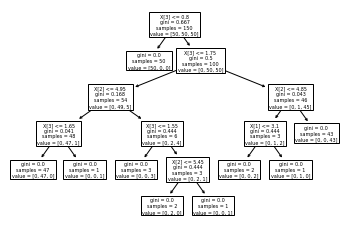

In [8]:
clf = clf.fit(iris.data, iris.target)
tree.plot_tree(clf)

# 트리 : 정보이득이 있어야
#     - 불순도가 낮아야 정보이득이 있다고 볼 수 있음.
#         이를 나누는 기준은 'gini'계수, 'entropy'
#         hyper parameter -> GridSearchCV
        
# 의사결정트리를 만드는 이유?
#     - 비교를 적게하기 위해서       time complexity : O(log n)

# 문제점 : 과적합, 변수의 순서를 달리하면 결과도 달라지는 문제 발생
#         -> max depth로 과적합 방지
#         -> min samples split : 노드를 나누기 위한 최소 개수 조정.
#         -> min samples leaf : 하나의 노드가 되기 위한 최소한의 수

# hyper parameter 조합을 만들어서 테스트 : GridSearchCV

# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [9]:
cross_val_score(clf, iris.data, iris.target, cv=10)

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 1.        , 1.        , 1.        ])

In [10]:
print(clf.get_n_leaves()) # leaf 갯수 확인

9


In [11]:
clf.get_depth() # 깊이 확인

5

In [13]:
clf.get_params() # gini가 default값임을 알 수 있다..

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 0,
 'splitter': 'best'}

In [14]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [15]:
print(iris.data.shape)
print(iris.feature_names)

(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [19]:
# 데이터프레임으로 변환
import pandas as pd
data = pd.DataFrame(iris.data)
print(data.head())

clf.predict(data.iloc[1:150,:])

     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [22]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
# 나이브 베이즈 : 베이즈값을 이용해서 음... 나중에하신다고.
from sklearn.preprocessing import Binarizer
# Binarizer : 경계값(threshold)을 기준으로 0,1로 나누어주는 것

pipe = make_pipeline(Binarizer(), MultinomialNB()) # 파이프라인

In [24]:
print(pipe.steps[0])
print(pipe[0])
# pipe['reduce_dim']

('binarizer', Binarizer(copy=True, threshold=0.0))
Binarizer(copy=True, threshold=0.0)


In [29]:
from sklearn.svm import SVC # support vector classfier
from sklearn.decomposition import PCA # principle component analysis
from sklearn.pipeline import Pipeline # 파이프라인

estimators = [('reduce_dim', PCA()), ('clf', SVC())]
# 파이프 바깥에서도 컨트롤이 가능하도록 이름을 주자
# PCA로 차원축소 결과를 토대로 SVC 한다는 소리다

pipe = Pipeline(estimators)
pipe

Pipeline(memory=None,
         steps=[('reduce_dim',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('clf',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [30]:
print(pipe.steps[0]) # PCA
print(pipe[0])

('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False))
PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)


In [31]:
# 상기 SVC와 같은 함수들에게 파라미터값을 전달하고 싶다면?

pipe.set_params(clf__C=10)
# C라는 파라미터를 변경하기 위해서는
# set_params('함수명'__'파라미터명')의 형식으로 해줘야..
# 이떄 __는 파이프라인을 타고 들어갈 때 필요한 instruction이다

# 이름을 주면 이렇게 파라미터값을 줄 수도 있다.

# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

Pipeline(memory=None,
         steps=[('reduce_dim',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('clf',
                 SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

# GridSearchCV

In [45]:
import numpy as np
def make_data(N, err=1.0, rseed=1):
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X,y

X, y = make_data(40)
print(type(X))

<class 'numpy.ndarray'>


In [46]:
from sklearn.model_selection import GridSearchCV # 파라미터 튜닝하는 것
from sklearn.preprocessing import PolynomialFeatures # 다차원 특성을 축소
from sklearn.linear_model import LinearRegression
import numpy as np

# 파이프라인을 리턴하는 함수
# **kwargs : dict들어가는 변동매개변수
def PolynomialRegression(degree = 2, **kwargs): 
    return make_pipeline(PolynomialFeatures(degree),
                        LinearRegression(**kwargs))

# 모델의 hyper parameter : PolynomialFeatures, LinearRegression 에 던져질 파라미터

param_grid = {'polynomialfeatures__degree' : np.arange(21), #차수.. 0~20까지?
             'linearregression__fit_intercept' : [True, False], #절편존재유무
             'linearregression__normalize' : [True, False]} # 노말라이즈 할지의 여부

In [47]:
# cross validation : 
grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

# 7개의 덩어리로 나누어 PR함수에다가 param_grid파라미터를 던져
# 

In [48]:
grid.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=7, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('linearregression',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
                                                         normalize=False))],
                                verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'linearregression__fit_intercept': [True, False],
                        

In [49]:
grid.best_params_ # 비선형회귀 4차일 경우 가장 좋은 결과가 나왔다는 말..

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

In [50]:
grid.best_estimator_ # 어떤 모델을 쓰는 것이 좋은건가

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=4, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
                                  normalize=True))],
         verbose=False)

In [51]:
grid.best_score_ 

0.8956938691106144

(-0.05673314103942452,
 0.994263633135634,
 -0.7459943120970807,
 10.918045992764213)

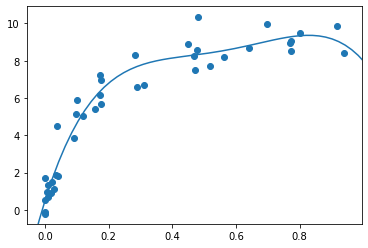

In [66]:
import matplotlib.pyplot as plt

model = grid.best_estimator_
X_test = np.linspace(-0.1, 10.1, 500)[:, None] # -0.1 ~ 10.1 까지 500개

plt.scatter(X.ravel(), y) # ravel() : 다차원 데이터를 1차원화

lim = plt.axis()
y_test = model.fit(X,y).predict(X_test)

plt.plot(X_test.ravel(), y_test)
plt.axis(lim)

In [61]:
np.linspace(-0.1, 10.1, 500)

array([-1.00000000e-01, -7.95591182e-02, -5.91182365e-02, -3.86773547e-02,
       -1.82364729e-02,  2.20440882e-03,  2.26452906e-02,  4.30861723e-02,
        6.35270541e-02,  8.39679359e-02,  1.04408818e-01,  1.24849699e-01,
        1.45290581e-01,  1.65731463e-01,  1.86172345e-01,  2.06613226e-01,
        2.27054108e-01,  2.47494990e-01,  2.67935872e-01,  2.88376754e-01,
        3.08817635e-01,  3.29258517e-01,  3.49699399e-01,  3.70140281e-01,
        3.90581162e-01,  4.11022044e-01,  4.31462926e-01,  4.51903808e-01,
        4.72344689e-01,  4.92785571e-01,  5.13226453e-01,  5.33667335e-01,
        5.54108216e-01,  5.74549098e-01,  5.94989980e-01,  6.15430862e-01,
        6.35871743e-01,  6.56312625e-01,  6.76753507e-01,  6.97194389e-01,
        7.17635271e-01,  7.38076152e-01,  7.58517034e-01,  7.78957916e-01,
        7.99398798e-01,  8.19839679e-01,  8.40280561e-01,  8.60721443e-01,
        8.81162325e-01,  9.01603206e-01,  9.22044088e-01,  9.42484970e-01,
        9.62925852e-01,  

In [ ]:
np.linspace(-0.1, 10.1, 500)[:,None] # [:,None]  행번찍고 열

In [68]:
import numpy as np
import pandas as pd
dataset= [10,12,12,13,12,11,14,13,15,10,10,10,100,12,14,13, 12,10, 10,11,12,15,12,13,12,11,14,13,15,10,15,12,10,14,13,15,10] 
outliers=[]


def detect_outlier(data_1):
    threshold = 3
    mean_1 = np.mean(data_1) # 평균계산
    std_1 = np.std(data_1)   # 표준편차
    
    for y in data_1:
        z_score = (y-mean_1) / std_1 # z점수 : 평균과 차이가 표준편차의 몇 배수로 위치해있나 , 3배수 : 99%
        
        if np.abs(z_score) > threshold: # threshold : 경계값 , 3배수 : 99%
            outliers.append(y)
            
    return outliers

# 표준정규분포 상에서 3배수 이상의 값을 이상치로 규정하는 함수
outlier_datapoints = detect_outlier(dataset)
print(outlier_datapoints)

[100]


[-3. -2. -1.  0.  1.  2.  3.  4.  5.  6.]
[[-3.]
 [-2.]
 [-1.]
 [ 0.]
 [ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]]


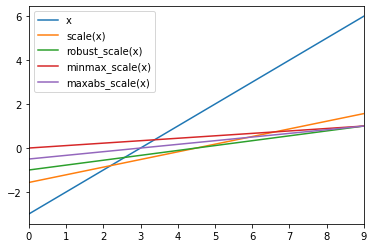

In [71]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale

# scale : z점수 -∞ ~ +∞
# robust_scale : 평균 : median 위치적 중위수 / IQR
# minmax_scale :  0 ~ 1
# maxabs_scale : -1 ~ 1

print( np.arange(10, dtype=np.float) - 3 )

x = ( np.arange(10, dtype=np.float) - 3 ).reshape(-1,1)
print(x)

df = pd.DataFrame( np.hstack([x, scale(x), robust_scale(x), minmax_scale(x), maxabs_scale(x)]),
                 columns = ["x", "scale(x)", "robust_scale(x)", "minmax_scale(x)", "maxabs_scale(x)"])
df.plot()

<class 'sklearn.utils.Bunch'>
전처리전 mean
 [5.84333333 3.05733333 3.758      1.19933333] 

전처리전 std
 [0.82530129 0.43441097 1.75940407 0.75969263] 

전처리후 mean
 [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15] 

전처리후 std
 [1. 1. 1. 1.] 



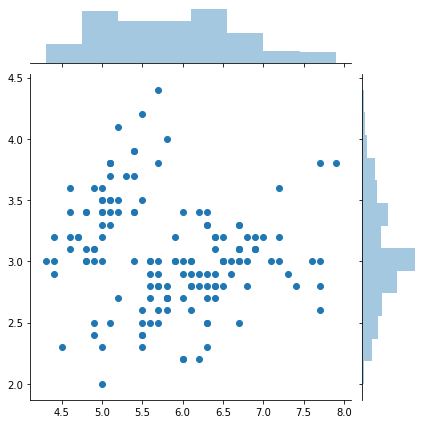

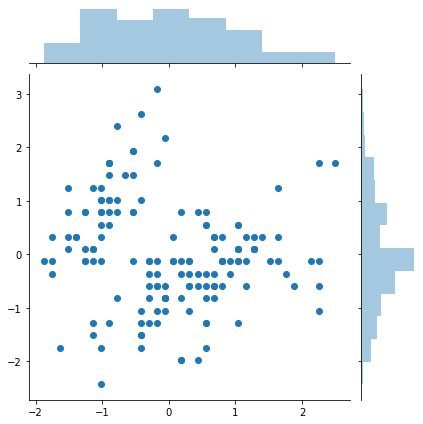

In [75]:
# 분포는 동일하다
# 그러면 정규화는 왜 하는가?   변수 기여도를 동일하게 하기 위해..

import seaborn as sns
from sklearn.datasets import load_iris

iris = load_iris()
print(type(iris))

data1 = iris.data
data2 = scale(iris.data)

print("전처리전 mean\n", np.mean(data1, axis=0),'\n')
print("전처리전 std\n", np.std(data1, axis=0),'\n')
print("전처리후 mean\n", np.mean(data2, axis=0),'\n')
print("전처리후 std\n", np.std(data2, axis=0),'\n')

sns.jointplot(data1[:,0], data1[:,1])
plt.show()

sns.jointplot(data2[:,0], data2[:,1])
plt.show()

In [76]:
# 상기 scale() 대신에 이걸 쓸 수도 있다.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # 인스턴스화
scaler.fit(data1)

data2 = scaler.transform(data1) # transformer(변환기), reg같은 건 estimator(추정기)라한다.
data1.std(), data2.std()

(1.9738430577598278, 1.0)

In [77]:
# scikits 내의 One Hot Encoder
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
X = np.array([[0], [1], [2]])
X
ohe.fit(X)
print(ohe.n_values_, ohe.feature_indices_, ohe.active_features_)
ohe.categories_

[3] [0 3] [0 1 2]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:100: DeprecationWarning: The ``n_values_`` attribute was deprecated in version 0.20 and will be removed 0.22.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:100: DeprecationWarning: The ``feature_indices_`` attribute was deprecated in version 0.20 and will be removed 0

[array([0., 1., 2.])]

In [79]:
print(ohe.transform(X).toarray())

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [86]:
# 원 핫 인코딩 해보기
# X = np.array([[0,0,4], [1,1,0], [0,2,1], [1,0,2], [1,1,3]])

ohe = OneHotEncoder()
X = np.array([[0,0,4], [1,1,0], [0,2,1], [1,0,2], [1,1,3]])
ohe.fit(X)
print(ohe.transform(X).toarray())

# 입력 3자리인데 10자리로 변경되었다.. 왜이런가?
# 첫째자리 0,1 두가지
# 둘쨰자리 0,1,2 세가지
# 세째자리 0,1,2,3,4 네가지
# 

[[1. 0. 1. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 1. 0. 0. 0. 0. 1. 0.]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [87]:
# Label Encoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit([1,2,2,6])
le.classes_

array([1, 2, 6])

In [88]:
le.transform([1,1,2,6]) # 라벨링

array([0, 0, 1, 2], dtype=int64)

In [89]:
# 라벨링값으로 실제값 조회
le.inverse_transform([0,0,1,2])

array([1, 1, 2, 6])

In [97]:
# 문제
# "서울", "서울", "대전", "부산"

le1 = LabelEncoder()
le1.fit(["서울", "서울", "대전", "부산"])
le1.classes_

array(['대전', '부산', '서울'], dtype='<U2')

In [95]:
le1.transform(["서울", "서울", "대전", "부산", "대전"])

array([2, 2, 0, 1, 0], dtype=int64)

In [98]:
list(le1.inverse_transform([2,2,1,0,2]))

['서울', '서울', '부산', '대전', '서울']

In [99]:
# DictVectorier
from sklearn.feature_extraction import DictVectorizer

v = DictVectorizer(sparse = False)
D = [{'foo' : 1, 'bar' : 2}, {'foo' : 3, 'baz' : 1}]
X = v.fit_transform(D)
X

#        'bar' 'baz' 'foo'
#첫번쨰    2     0     1
#두번째    0     1     3

array([[2., 0., 1.],
       [0., 1., 3.]])

In [100]:
v.feature_names_

['bar', 'baz', 'foo']

In [101]:
v.inverse_transform(X)

[{'bar': 2.0, 'foo': 1.0}, {'baz': 1.0, 'foo': 3.0}]

In [107]:
# 결측치 처리

from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean') # mean 평균, most_frequent최빈값
imp_mean.fit([[7,2,3],[4,np.nan,6], [10,5,9]]) # 7+4+10/3 = 7 | 2+5/2 = 3.5 | 3+6+9/3 = 6

X = [[np.nan, 2,3], [4, np.nan,6], [10,np.nan,9]]
print(imp_mean.transform(X))

[[ 4.  2.  3.]
 [ 4.  2.  6.]
 [10.  2.  9.]]


In [108]:
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(6).reshape(3,2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [109]:
poly = PolynomialFeatures(2)# 다항식 계산 결과값을 속성값으로 추가
# [1, a, b, a^2, ab, b^2] => 비선형회귀

poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [ ]:
# Ensemble 학습
# RandomForest : DT를 여러개의 모델로 구축해서,
#     - 연속형 : 결과값의 평균으로 예측
#     - 이산형 : 결과값의 투표를 통해서 결정 

In [136]:
from sklearn.datasets import make_classification
X, y = make_classification(1000)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=30)
rf.fit(X,y)

# n_estimators가 10개.. = DT 10개 만들었다는 말

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [116]:
print("Accuracy : \t", ( y == rf.predict(X) ).mean()) # 1000개에 대한 예측값들의 평균을 구하면?

Accuracy : 	 1.0


Text(0.5, 1.0, 'feature')

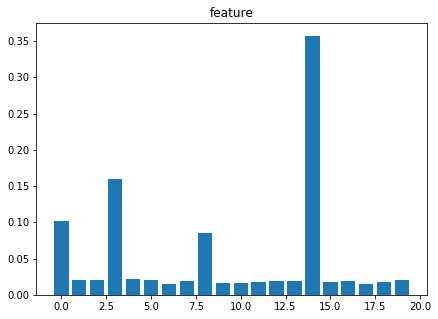

In [118]:
f, ax = plt.subplots(figsize = (7,5))

ax.bar(range(0, len(rf.feature_importances_)),
      rf.feature_importances_)
ax.set_title("feature") # 특성 중요도

In [119]:
print("특성수", rf.n_features_)
print("모델", rf.estimators_)

특성수 20
모델 [DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1028558976, splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=591379110, splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                     

In [141]:
# 문제 : load_boston()을 이용해 데이터를 로딩하고 rf로 변수중요도를 출력해보시오

from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor


boston = load_boston()
X = boston["data"]
y = boston["target"]
names = boston["feature_names"]

rf = RandomForestRegressor()
rf.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [144]:
print( sorted( zip( map( lambda x : round(x, 2), rf.feature_importances_ ), names ), reverse=True )) # 내림차순

[(0.41, 'RM'), (0.39, 'LSTAT'), (0.06, 'DIS'), (0.04, 'CRIM'), (0.03, 'NOX'), (0.02, 'PTRATIO'), (0.01, 'TAX'), (0.01, 'RAD'), (0.01, 'B'), (0.01, 'AGE'), (0.0, 'ZN'), (0.0, 'INDUS'), (0.0, 'CHAS')]


['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


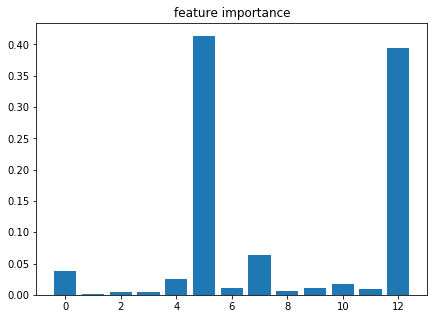

In [146]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize = (7,5))
ax.bar(range(0, len(rf.feature_importances_)),
      rf.feature_importances_)
ax.set_title('feature importance')
print(names)

# 평가 : 예측 - 상관계수 , mse() : mean square error

추측값에 대한 정확성 측정 방법

In [147]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mean_squared_error(y, rf.predict(X))
# 평균 제곱 오차 : 오차의 제곱에 대해 평균을 취한 것
# 작을 수록 원본과의 오차가 적은 것이므로
# 추측한 값의 정확성이 높은 것

2.3443707509881424

In [148]:
mean_absolute_error(y, rf.predict(X))
# 평균 절대 오차 : 모든 절대 오차의 평균...

0.9460474308300393

In [152]:
r2_score(y, rf.predict(X))
# 결정계수

0.9722295300078178

In [154]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators = 100, random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [157]:
print("훈련테스트정확도 : {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test, y_test)))

훈련테스트정확도 : 1.000
테스트 세트 정확도 : 0.972


In [158]:
from sklearn.tree import export_graphviz

export_graphviz(forest.estimators_[0], out_file= "tree.dot", class_names=["악성", "양성"],
               feature_names=cancer.feature_names, impurity=False, filled=True)

In [159]:
from IPython.display import display
import graphviz
with open("tree.dot", "rt", encoding = "UTF-8") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))
display.Image(graphviz.Source(dot_graph))

ModuleNotFoundError: No module named 'graphviz'